<a href="https://colab.research.google.com/github/welingtongomes/ProjetoCifar_10/blob/main/ProjetoCifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools


#importando bibliotecas do Keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import batch_normalization
from keras.regularizers import l2
from keras.datasets import cifar10,cifar100
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.engine.sequential import input_layer
from keras import regularizers

#importando biblioteca para utilizar na abordagem Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

#importando biblioteca para efetuarmos a matriz confusão
from sklearn.metrics import confusion_matrix




In [23]:
(X_train10, Y_train10), (X_test10, Y_test10) = cifar10.load_data()


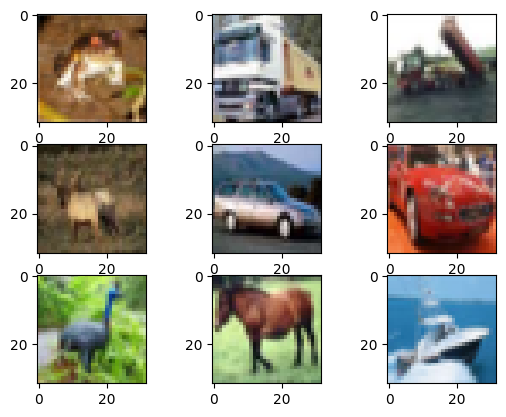

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]]


In [24]:

#São 60.000 imagens, sendo 50.000 de treinamento e 10.000 de teste
#Classes que compõem o dataset Cifar10

'''class_names = ['Avião',
	             'Automóvel',
               'Pássaro',
               'Gato',
               'Cervo',
               'Cachorro',
               'Sapo',
               'Cavalo',
               'Navio',
               'Caminhão']'''
#Para cada classe são 5.000 de treinamento e 1.000 de teste


#itera sobre nove imagems
for i in range(9):
  #prepara as imagens para exibigação
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train10[i])

plt.show()

#imprime as classes do dataset cifar10
print(Y_train10[0:9])


In [25]:
#Cria a Alexnet para cifar10

alexnet = Sequential()

# Camada 1
# Camada convolucional | Parametros passados: número de filtros, tamanho do kernel (janela deslizante) - passamos em forma de uma matriz (...)
# (...) strides, em portugues mais conhecido como passos, no caso, é o número de pixels
#utilizamos input_shape 32,32,3 porque são as dimensões do cifar10
# o parametro padding='same' expande nossa imagem artificialmente para que o gere o feature map com o mesmo tamanho do original

alexnet.add(Conv2D(96, (3,3), strides=(4,4), input_shape=(32,32,3), padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2))) #utilizamos o pool_size 2,2 porque é o padrão do artigo da rede alexnet

#Camada 2
alexnet.add(Conv2D(256, (5,5),padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2)))

#Camada 3
alexnet.add(Conv2D(384, (3,3),padding='same'))
alexnet.add(Activation('relu'))

#Camada 4
alexnet.add(Conv2D(384, (3,3),padding='same'))
alexnet.add(Activation('relu'))

#Camada 5
alexnet.add(Conv2D(256, (3,3),padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2)))

#Realiza o achatamento dos pixels
alexnet.add(Flatten())

#Camada 6
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))


#Camada 7
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))

#Camada 8
alexnet.add(Dense(10))
alexnet.add(Activation('softmax')) #utilizamos a função de ativação softmax porque este é um problema de classificação






In [26]:
#Compila o modelo

#utilizamos a configuração de perda usando categorical_crossentropy, onde cada amostra pode pertencer apenas a uma classe.
#utilizamos o otimizador Adam, ele ajusta os pesos do modelo durante o treinamento, passamos um parametro baixo 0.001 (...)
#(...) passamos um parametro baixo 0.001 para darmos passos menores, podemos alterar alterar para testar a acurácia;
#utilizamos accuracy porque é mais utilizado em problemas de classificação, vai retornar a qtde de amostras (...)
#(...) amostras classificadas corretamente em relação ao total de amistras

alexnet.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#normalização
#utilizamos to_categorical para transformar em one_hot_vector
#utilizamos shuffle=True para embaralharmos antes de cada época, é interessante porque varia o treinamento
alexnet.fit(X_train10 / 255.0, to_categorical(Y_train10),batch_size=128, shuffle=True, epochs=30,validation_data=(X_test10 / 255.0, to_categorical(Y_test10)))



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
391/391 [==============================] - 8s 20ms/step - loss: 1.9288 - accuracy: 0.2229 - val_loss: 1.7130 - val_accuracy: 0.3326
Epoch 2/30
391/391 [==============================] - 7s 17ms/step - loss: 1.5592 - accuracy: 0.4022 - val_loss: 1.4365 - val_accuracy: 0.4600
Epoch 3/30
391/391 [==============================] - 7s 18ms/step - loss: 1.3711 - accuracy: 0.4928 - val_loss: 1.3291 - val_accuracy: 0.5175
Epoch 4/30
391/391 [==============================] - 7s 18ms/step - loss: 1.2591 - accuracy: 0.5397 - val_loss: 1.3267 - val_accuracy: 0.5182
Epoch 5/30
391/391 [==============================] - 7s 18ms/step - loss: 1.1659 - accuracy: 0.5770 - val_loss: 1.2433 - val_accuracy: 0.5563
Epoch 6/30
391/391 [==============================] - 7s 19ms/step - loss: 1.0955 - accuracy: 0.6049 - val_loss: 1.2111 - val_accuracy: 0.5708
Epoch 7/30
391/391 [==============================] - 7s 18ms/step - loss: 1.0337 - accuracy: 0.6284 - val_loss: 1.1974 - val_accuracy: 0.5863

In [27]:
y_pred = alexnet.predict(X_test10 / 255.0)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(Y_test10, y_pred_classes)
print(confusion_mtx)

313/313 [==============================] - 1s 3ms/step
[[633  45  32  36  31  10  10  17 129  57]
 [ 21 732   4  11   3   4   7  11  44 163]
 [106  14 354 110 139  92  70  55  35  25]
 [ 28  17  52 467  64 161  99  43  30  39]
 [ 41   9  61  98 539  48  85  95  18   6]
 [ 16   8  49 280  71 430  48  57  18  23]
 [ 10  17  50 105 102  35 634  17  12  18]
 [ 21  15  34  94  89  60  16 628   2  41]
 [ 87  55  16  23  15   3   3   0 745  53]
 [ 44 157   7  22   6   7  12  16  50 679]]


In [39]:
# Cálculo da soma da diagonal principal
diagonal_sum = np.trace(confusion_mtx)

print("O total de amostras corretamente previstas para todas as classes foi de:",diagonal_sum,",de um total de 10.000 imagens")

O total de amostras corretamente previstas para todas as classes foi de: 6337 ,de um total de 10.000 imagens


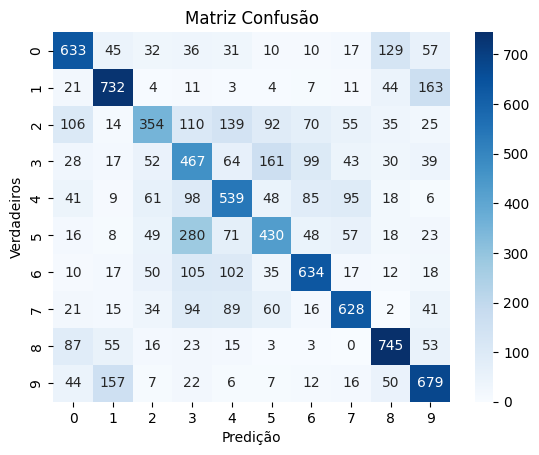

In [29]:
#Plotando a matriz confusão

confusion_mtx = confusion_matrix(Y_test10, y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdadeiros')
plt.title('Matriz Confusão')
plt.show()


In [30]:
#Cria a Alexnet para cifar10 utilizando a abordagem Data Augmentation

alexnet = Sequential()

# Camada 1
# Camada convolucional | Parametros passados: número de filtros, tamanho do kernel (janela deslizante) - passamos em forma de uma matriz (...)
# (...) strides, em portugues mais conhecido como passos, no caso, é o número de pixels
#utilizamos input_shape 32,32,3 porque são as dimensões do cifar10 e cifar100
# o parametro padding='same' expande nossa imagem artificialmente para que o gere o feature map com o mesmo tamanho do original

alexnet.add(Conv2D(96, (3,3), strides=(4,4), input_shape=(32,32,3), padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2))) #utilizamos o pool_size 2,2 porque é o padrão do artigo da rede alexnet

#Camada 2
alexnet.add(Conv2D(256, (5,5),padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2)))

#Camada 3
alexnet.add(Conv2D(384, (3,3),padding='same'))
alexnet.add(Activation('relu'))

#Camada 4
alexnet.add(Conv2D(384, (3,3),padding='same'))
alexnet.add(Activation('relu'))

#Camada 5
alexnet.add(Conv2D(256, (3,3),padding='same'))
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2)))

#Realiza o achatamento dos pixels
alexnet.add(Flatten())

#Camada 6
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))


#Camada 7
alexnet.add(Dense(4096))
alexnet.add(Activation('relu'))

#Camada 8
alexnet.add(Dense(10))
alexnet.add(Activation('softmax')) #utilizamos a função de ativação softmax porque este é um problema de classificação





In [31]:
# Criação do objeto ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [32]:
#Compila o modelo utilizando a abordagem Data Augmentation

alexnet.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#Treinamento do modelo usando o ImageDataGenerator
alexnet.fit_generator(datagen.flow(X_train10 / 255.0, to_categorical(Y_train10), batch_size=128), steps_per_epoch=len(X_train10) / 128, epochs=30,validation_data=(X_test10 / 255.0, to_categorical(Y_test10)))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30


<ipython-input-32-6374d5d738c5>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  alexnet.fit_generator(datagen.flow(X_train10 / 255.0, to_categorical(Y_train10), batch_size=128), steps_per_epoch=len(X_train10) / 128, epochs=30,validation_data=(X_test10 / 255.0, to_categorical(Y_test10)))


390/390 [==============================] - 33s 83ms/step - loss: 1.9762 - accuracy: 0.2197 - val_loss: 1.7734 - val_accuracy: 0.3124
Epoch 2/30
390/390 [==============================] - 33s 85ms/step - loss: 1.7232 - accuracy: 0.3371 - val_loss: 1.6049 - val_accuracy: 0.3991
Epoch 3/30
390/390 [==============================] - 32s 81ms/step - loss: 1.6219 - accuracy: 0.3951 - val_loss: 1.4640 - val_accuracy: 0.4526
Epoch 4/30
390/390 [==============================] - 32s 83ms/step - loss: 1.5254 - accuracy: 0.4428 - val_loss: 1.3777 - val_accuracy: 0.4988
Epoch 5/30
390/390 [==============================] - 33s 84ms/step - loss: 1.4642 - accuracy: 0.4713 - val_loss: 1.3844 - val_accuracy: 0.4939
Epoch 6/30
390/390 [==============================] - 32s 83ms/step - loss: 1.4112 - accuracy: 0.4913 - val_loss: 1.2728 - val_accuracy: 0.5331
Epoch 7/30
390/390 [==============================] - 31s 80ms/step - loss: 1.3701 - accuracy: 0.5052 - val_loss: 1.2720 - val_accuracy: 0.5338
Epo

In [33]:
y_pred = alexnet.predict(X_test10 / 255.0)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(Y_test10, y_pred_classes)
print(confusion_mtx)

313/313 [==============================] - 1s 4ms/step
[[616  51  43  24  14   4  17  26  95 110]
 [  1 796   1   5   0   1   4   4   9 179]
 [ 54  20 404  45 120  60 195  48  23  31]
 [ 11  47  25 414  40 188 163  44  16  52]
 [ 15  11  32  46 496  20 233 117  20  10]
 [  4  24  25 137  57 505 112  86  11  39]
 [  7  10  16  45  31  13 828  13   9  28]
 [  9  16  15  37  37  39  46 714   5  82]
 [ 34  98   6  12   3   4   5   4 752  82]
 [ 14 121   4  10   2   3   9   8  17 812]]


In [34]:
# Cálculo da soma da diagonal principal
diagonal_sum = np.trace(confusion_mtx)

print("O total de amostras corretamente previstas para todas as classes é de:",diagonal_sum,",de um total de 1.000 imagens")

O total de amostras corretamente previstas para todas as classes é de: 6337 ,de um total de 1.000 imagens


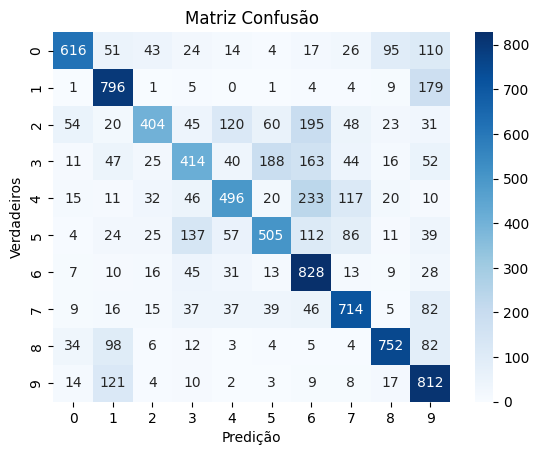

In [35]:
#Plotando a matriz confusão

confusion_mtx = confusion_matrix(Y_test10, y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdadeiros')
plt.title('Matriz Confusão')
plt.show()